### Prepare the submission zip file

In [1]:
import os
import zipfile

def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')

submission_zip = './challenge_1_submission_images.zip'
submission_directory = 'challenge_1_submission_images'
if not os.path.isdir(submission_directory):
    unzip_folder(submission_zip,submission_directory)

The zip file ./challenge_1_submission_images.zip has been extracted to the directory challenge_1_submission_images


In [2]:
# Load the Model
from ultralytics import YOLO
model = YOLO('our-best-runs/detect/train/weights/best.pt')

In [3]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedresidentialbuilding', 1: 'undamagedcommercialbuilding', 2: 'damagedresidentialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/Validation_Data_JPEG'
directory = 'challenge_1_submission_images/Submission data'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()
            clss_list = r.boxes.cls.cpu().numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")

challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg
Making a prediction on  Validation_Post_Event_006.jpg



image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg: 512x512 32 0s, 1 1, 13 2s, 3 3s, 5.2ms
Speed: 1.1ms preprocess, 5.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg: 512x512 22 0s, 2 1s, 9 2s, 1 3, 5.8ms
Speed: 0.8ms preprocess, 5.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg: 512x512 30 0s, 3 2s, 5.8ms
Speed: 1.6ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels

image 1/1 /

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg
Making a prediction on  Validation_Post_Event_012.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg
Making a prediction on  Validation_Post_Event_005.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_004.jpg
Making a prediction on  Validation_Post_Event_004.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_007.jpg
Making a prediction on  Validation_Post_Event_007.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg
Making a prediction on  Validation_Post_Event_009.jp

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg: 512x512 14 0s, 3 1s, 1 2, 4 3s, 6.2ms
Speed: 0.9ms preprocess, 6.2ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
7 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg: 512x512 6 0s, 2 1s, 4 2s, 7 3s, 5.2ms
Speed: 0.7ms preprocess, 5.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
8 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg: 512x512 5 0s, 2 1s, 2 2s, 5.7ms
Speed: 0.8ms preprocess, 5.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
9 labels saved to runs/detect/predict/labels

image 1

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg
Making a prediction on  Validation_Post_Event_010.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg
Making a prediction on  Validation_Post_Event_011.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_003.jpg
Making a prediction on  Validation_Post_Event_003.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg
Output files generated successfully.


In [4]:
import shutil

# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.


### Show predicted images

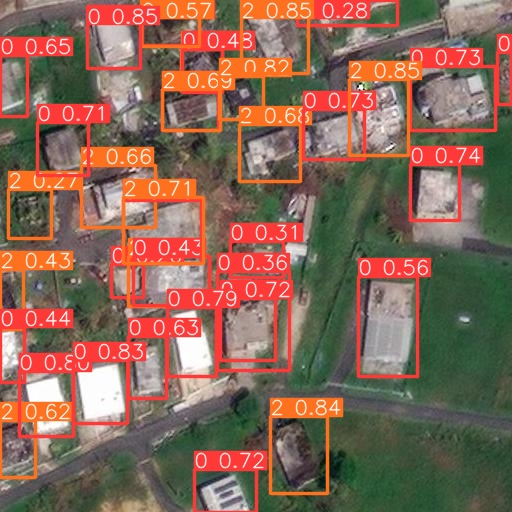

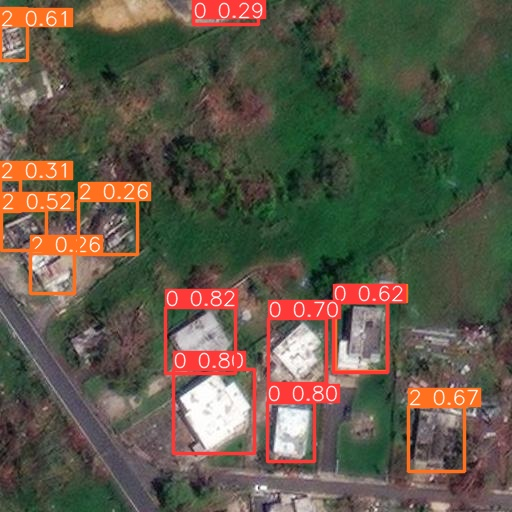

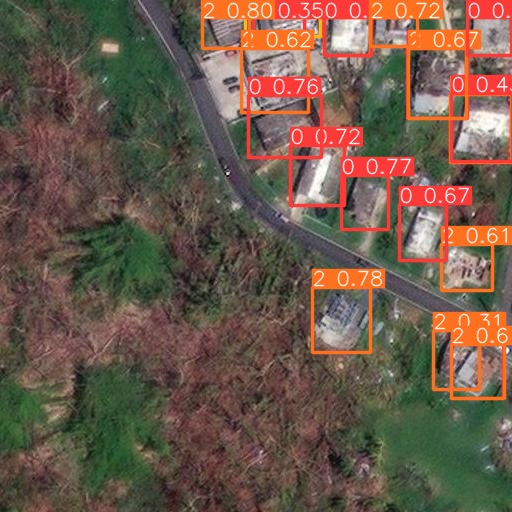

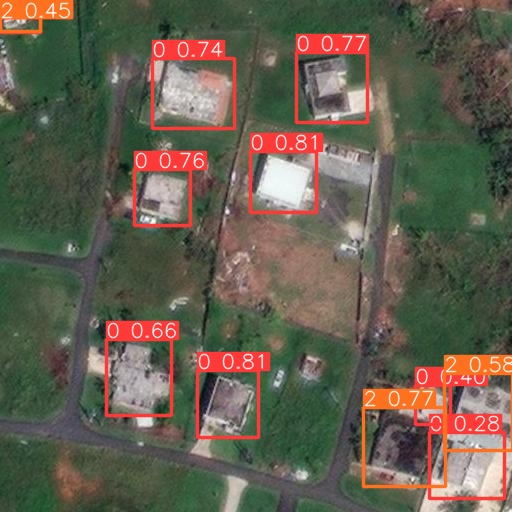

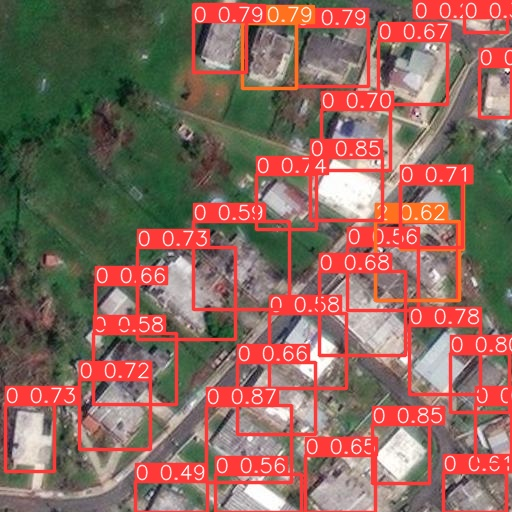

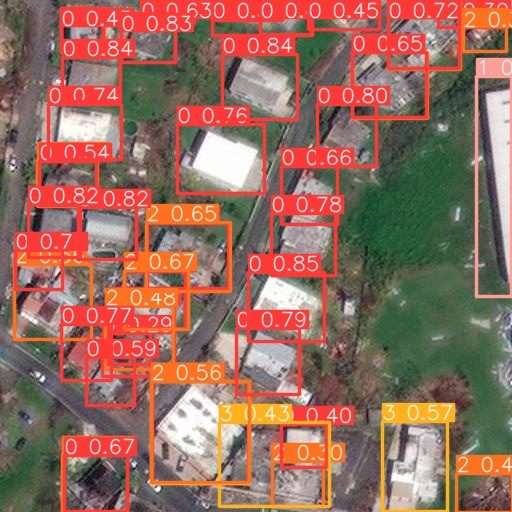

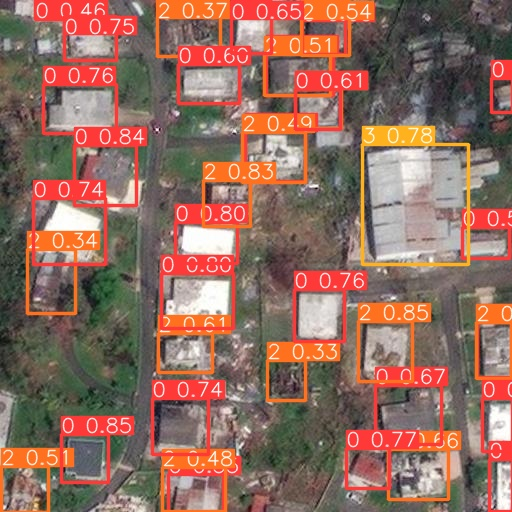

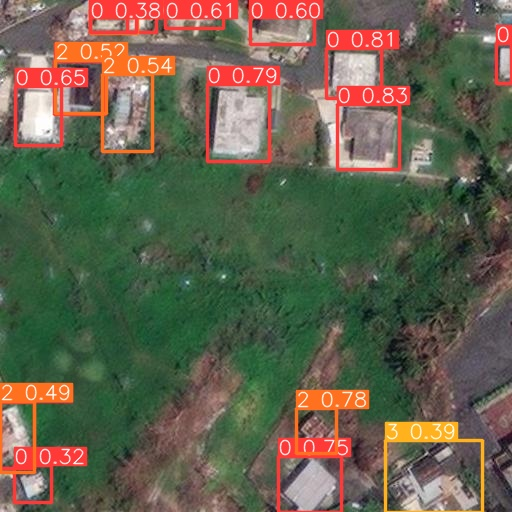

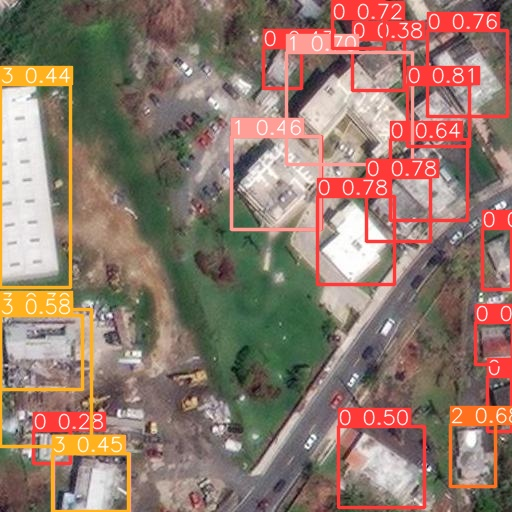

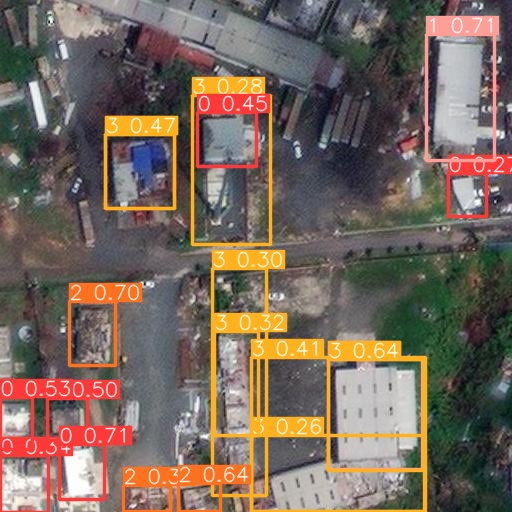

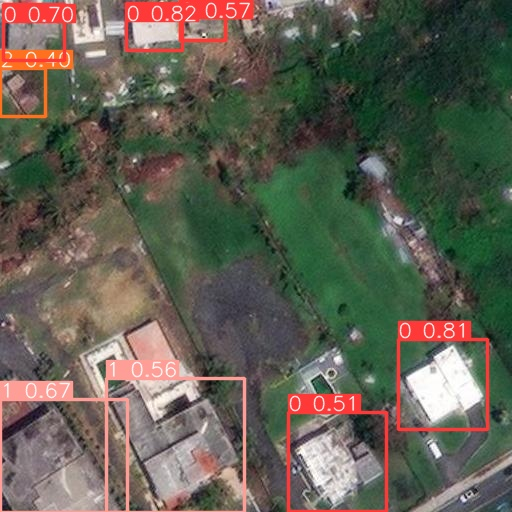

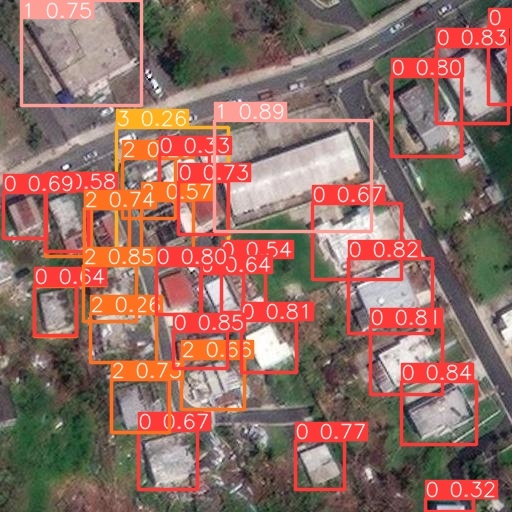

In [5]:
from IPython.display import Image
from IPython.display import display

for idx in range(1, 13, 1):
    idx = str(idx).zfill(3)
    img = Image(filename='runs/detect/predict/Validation_Post_Event_{}.jpg'.format(idx), width=600)
    display(img)